In [1]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import json
import ast

Using TensorFlow backend.


In [15]:
model_path = "/home/thimabru/Deep_Learning_aula/homework1/weights/Vgg11_small_32->256_lr=1e-3_decay=0.01_bs=32/best_model.h5"
model = load_model(model_path)

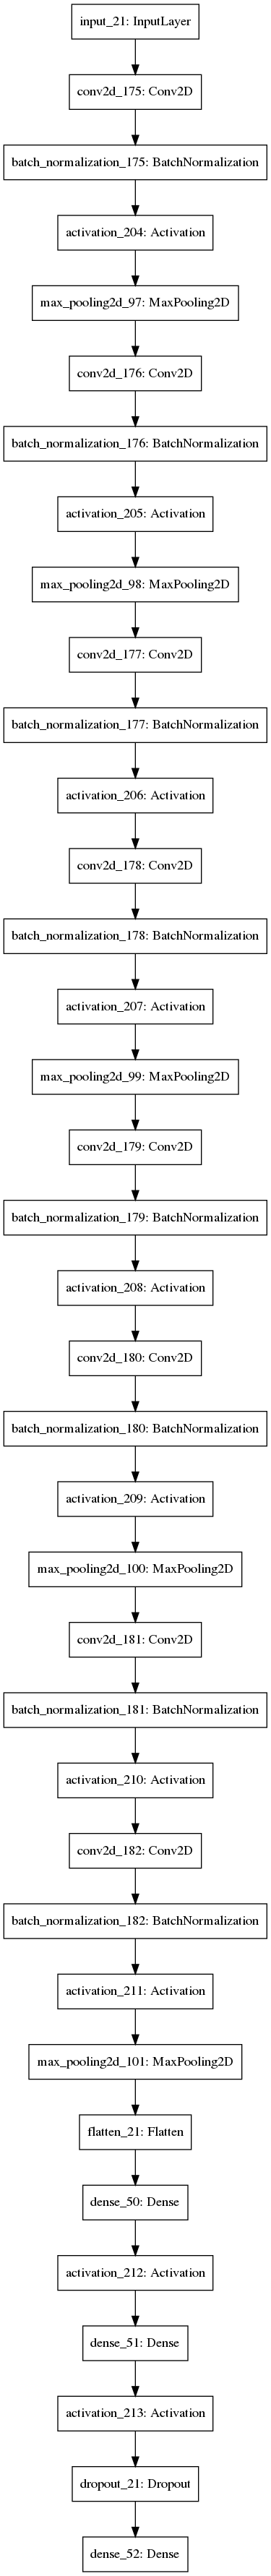

In [16]:
plot_model(model, to_file='model.png')

In [17]:
batch_size = 32
input_shape = (256, 256, 3)
(w, h, _) = input_shape

test_folder = "UCMERCED_HW_SceneClassification/data/test_separated"
test_aug = ImageDataGenerator(rescale=1./255)

test_generator = test_aug.flow_from_directory(test_folder,  
                                         target_size=(w, h),  batch_size=batch_size,  
                                         class_mode='categorical', shuffle=True, seed=42)
scoreSeg = model.evaluate_generator(test_generator, 32)

Found 420 images belonging to 21 classes.


In [18]:
print(model.metrics_names)
print(scoreSeg)

['loss', 'accuracy']
[0.3156322240829468, 0.9173553586006165]


In [19]:
def graph_training_history(history):
    acc_train = history['accuracy']
    acc_test = history['val_accuracy']
    loss_train = history['loss']
    loss_test = history['val_loss']
    #print(acc_train, acc_test, loss_train, loss_test)
    plt.rcParams['axes.facecolor']='white'
    plt.figure(1)

    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(acc_train)
    plt.plot(acc_test)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()

    # summarize history for loss
    plt.subplot(122)
    plt.plot(loss_train)
    plt.plot(loss_test)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.tight_layout()
    
    plt.show()

In [20]:
json_path = "/home/thimabru/Deep_Learning_aula/homework1/weights/Vgg11_small_32->256_lr=1e-3_decay=0.01_bs=32/history_model.json"
with open(json_path, 'r') as f:
    hist = json.load(f)

if( isinstance(hist, str) == True):
    history = ast.literal_eval(hist)
else:
    history = hist

<class 'dict'>


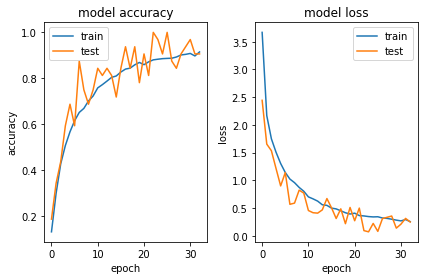

In [21]:
graph_training_history(history)